OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


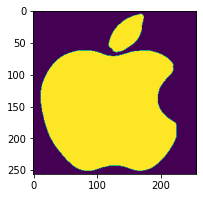

[  0 255]


In [1]:
from rembg import remove
from rembg import new_session
import copy
import json
import shutil
import cv2
from rembg import remove
from rembg import new_session
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import copy
import random
from imantics import Polygons, Mask

t_input_path = "/data/ij/background_remove/target_mask/ori_apple/1.jpg"
b_input_path = '/data/ij/coco_img/test/000000003903.jpg'



target_img = cv2.imread(t_input_path)
back_img = cv2.imread(b_input_path)


out = remove(target_img, only_mask=True,post_process_mask=True,session=new_session('u2net'))
mask = out.copy()

f = plt.figure()
f.set_figwidth(5)
f.set_figheight(3)
plt.imshow(mask)
plt.show()


print(np.unique(mask))
        

[  0 255]


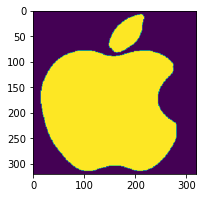

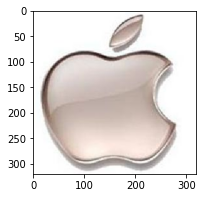

In [2]:
resize_size = 0.8
resize_size_w = int(mask.shape[1]/resize_size)
resize_size_h = int(mask.shape[0]/resize_size)
mask = cv2.resize(mask, (resize_size_w, resize_size_h), interpolation=cv2.INTER_NEAREST)
target_img = cv2.resize(target_img, (resize_size_w, resize_size_h), interpolation=cv2.INTER_NEAREST)

print(np.unique(mask))

f = plt.figure()
f.set_figwidth(5)
f.set_figheight(3)
plt.imshow(mask)
plt.show()

f = plt.figure()
f.set_figwidth(5)
f.set_figheight(3)
plt.imshow(target_img)
plt.show()

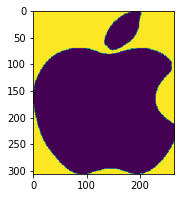

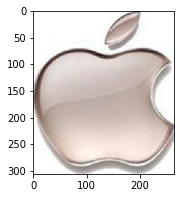

In [3]:

x, y, w, h = cv2.boundingRect(mask)
mask[mask==0] = 100
mask[mask==255] = 0
mask[mask==100] = 255
mask = mask[y:y+h,x:x+w]
target_img = target_img[y:y+h,x:x+w]

f = plt.figure()
f.set_figwidth(5)
f.set_figheight(3)
plt.imshow(mask)
plt.show()

f = plt.figure()
f.set_figwidth(5)
f.set_figheight(3)
plt.imshow(target_img)
plt.show()

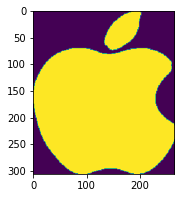

In [4]:
mask_inv = cv2.bitwise_not(mask)

height1, width1 = target_img.shape[:2]

resize_size_w = mask.shape[1]
resize_size_h = mask.shape[0]

x_limit = int(back_img.shape[1])-resize_size_w
y_limit = int(back_img.shape[0])-resize_size_h



x1 = random.randrange(0,x_limit)
y1 = random.randrange(0,y_limit)
x2 = x1 + width1
y2 = y1 + height1
bbox = [x1 ,y1, x2, y2]

f = plt.figure()
f.set_figwidth(5)
f.set_figheight(3)
plt.imshow(mask_inv)
plt.show()

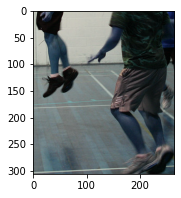

In [5]:
roi = back_img[y1:y2, x1:x2]

f = plt.figure()
f.set_figwidth(5)
f.set_figheight(3)
plt.imshow(roi)
plt.show()

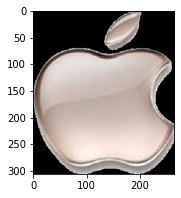

In [6]:
fg = cv2.bitwise_and(target_img, target_img, mask=mask_inv)

f = plt.figure()
f.set_figwidth(5)
f.set_figheight(3)
plt.imshow(fg)
plt.show()



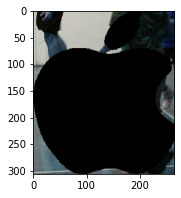

In [7]:
bg = cv2.bitwise_and(roi, roi, mask=mask)

f = plt.figure()
f.set_figwidth(5)
f.set_figheight(3)
plt.imshow(bg)
plt.show()



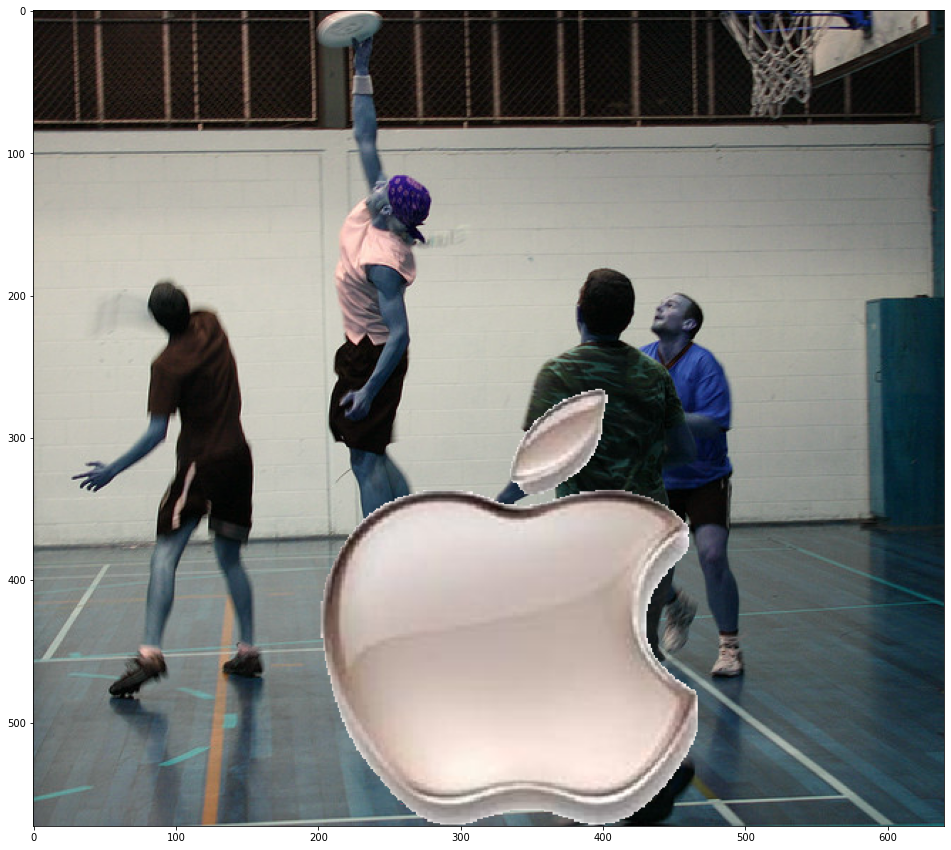

In [8]:
back_img[y1:y2, x1:x2] = cv2.add(fg, bg)


f = plt.figure()
f.set_figwidth(20)
f.set_figheight(15)
plt.imshow(back_img)
plt.show()
